<a href="https://colab.research.google.com/github/MatchLab-Imperial/machine-learning-course/blob/main/ML_non_linear_predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear Polynomial Transforms

## Classification

Previousely, you have experimented with the perceptron learning algorithm (PLA) which finds a solution with a training error of zero when applied to linearly seperable data. However, you found that some classes are not linearly separable. In such cases, non-linear transforms may be applied to the data to make the prediction task easier. This will be illustrated in this tutorial, where we will be using again the Iris dataset.

Reminder - the Iris flowers Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris - Versicolor, Virginica and Setosa.

The machine learning task in this exercise is to classify samples into different species. The code below implements a polynomial transformation of the original features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

This code implements polynomial transformation of features.

\begin{equation}
z_i = c_i x_{i}^{d_i} + c_i x_{i}^{d_{i-1}}
\end{equation}
\begin{equation}
z = [z_1, z_2]
\end{equation}

Use the sliders below to choose 2 out of 4 available features, and tranform them with polynomial of degree $d$ and coefficient $c$.

By changing featuresx and featuresy you are chosing which of the four features are displayed on axis x and y. These original features are displayed in first figure.

In [4]:
from sklearn.datasets import load_iris

@interact

def plot_reg(featurex =  (0,3,1), featurey = (0,3,1), d = (-8,10,1),c =(-8,10,1)):
    iris = load_iris()
    features = iris.data.T
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(121)
    plt.xlabel(iris.feature_names[featurex])
    plt.ylabel(iris.feature_names[featurey])
    plt.title("Original")
    scatter = plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')

    features[featurex] = c*features[featurex]**d + c*features[featurex]**(d-1)
    features[featurey] = c*features[featurey]**d + c*features[featurey]**(d-1)
    plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names[1:]))
#     plt.legend(iris.target_names)
#     plt.figure()
    
    plt.subplot(122)
    scatter = plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')    
    plt.xlabel(iris.feature_names[featurex])
    plt.ylabel(iris.feature_names[featurey])    
    plt.title("Transformed polynomial")
    plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names[1:]))

interactive(children=(IntSlider(value=1, description='featurex', max=3), IntSlider(value=1, description='featu…

# Coursework

## Task 1: 

Combining the code above with the one from the Perceptron exercise, use the pocket algorithm to train 3 linear classifiers. Each of the classifiers should use all 4 available features and be able to discern a single species of iris from the others. After training, you should combine the three classifiers into a single multiclass classifier; the manner in which you do this is up to you. Find the feature transformation which leads to the best overall classification results.

In your report:

- Report results for the best performance.
- Include model parameters, a figure with the training error vs iterations of the pocket algorithm and list 10 examples of misclassified data: 5 of false negatives, and 5 of false positives (only list features, you can include 1 with an image). If you do not have 10 misclassified datapoints, list those you have.

In [10]:
import seaborn as sns

def predict(W, X):
    """ Return class label after each setp """
    return np.where(net_input(W, X) >= 0.0, 1, -1)      

def net_input(W, X):
    """ Calculate net input """
    return np.dot(X, W[1:]) + W[0]
        
def plot_errors(errors):
    [err_01, err_12, err_02] = errors
    
    plt.figure(figsize=(7,4))
    plt.title("Training error vs iterations (Setosa vs Others)")
    plt.plot(range(1, len(err_01) + 1), err_01, marker='.')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()
    
    plt.figure(figsize=(7,4))
    plt.title("Training error vs iterations (Versicolor vs Others)")
    plt.plot(range(1, len(err_12) + 1), err_12, marker='.')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()
    
    plt.figure(figsize=(7,4))
    plt.title("Training error vs iterations (Virginica vs Others)")    
    plt.plot(range(1, len(err_02) + 1), err_02, marker='.')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')   
    plt.show()  
    
def print_weights(w, errors, title):
    i_best = np.argmin(errors)
    min_error = errors[i_best]
    w_str = ",".join(["%.2g" % w[i] for i in range(len(w))])
    print("Best result (%s):\titer=%d\terror=%d\tW=[%s]" % (title, i_best, min_error, w_str))
    
def fit_pocket(n_iter, X, y):
    W = np.zeros(1 + X.shape[1])
    errors_ = []
    # initialise global minimum error to remember the best weights
    min_error = len(y)
    for i in range(n_iter):
        for j, (xi, target) in enumerate(zip(X,y)):
            update = target - predict(W, xi)
            W[1:] += update*xi
            W[0] += update
        # errors on whole dataset 
        errors = 0
        for j, (xi, target) in enumerate(zip(X, y)):
            if predict(W, xi) != target:
                errors += 1
        # -------------------------------------------
        errors_.append(errors) 
        i += 1
#         print("Iteration: %d\tWeight: [%g,%g,%g]\tError: %d" % (i, W[0],W[1],W[2], errors))

        # Store best weights (minimal misclassification error)
        if errors < min_error:
            i_best = i
            W_best = np.copy(W)
            min_error = errors
        
    return W_best, errors_

def classify(weights, x):
    """
    Return combined prediction of setosa, versicolor and virginica classifiers
    :param weights: list of weights for setosa, versicolor and virginica classifiers
    :param x: datapoint with 4 features
    :return output class 0 (setosa), 1 (versicolor) or 2 (virginica)
    """    
    (w0, w1, w2) = weights
    y0 = w0 @ np.insert(x,0,1).T    
    y1 = w1 @ np.insert(x,0,1).T
    y2 = w2 @ np.insert(x,0,1).T
    
    # good predictions
    preds = np.array([y0, y1, y2])
    best_pred = np.argmax(-preds) # get target index with strongest prediction for -1
    
    return best_pred

def conf_matrix(y_true, y_pred, label):
    """
    Plot confusion matrices and print no. of FP & FN for given label (setosa/versicolor/virginica)
    """
    N = len(y_true)
    tp = len([i for i in range(N) if y_true[i] == label and y_pred[i] == label])
    fp = len([i for i in range(N) if y_true[i] != label and y_pred[i] == label])
    tn = len([i for i in range(N) if y_true[i] != label and y_pred[i] != label])
    fn = len([i for i in range(N) if y_true[i] == label and y_pred[i] != label])
    
    conf_matrix = np.array([[tp, fn], [fp, tn]])    
    
    plt.figure(figsize=(3,2.4))
    name = "setosa" if label==0 else ("versicolor" if label==1 else "virginica")
    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=[name, "other"], yticklabels=[name, "other"]).set(
        title="Confusion matrix for\n%s classifications" % name)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.savefig("figures/3.%d.png" % (5+label), bbox_inches='tight')
    plt.show()
    print("No. of FP = %d\tNo. of FN = %d\n" % (fp, fn))    
    
    return

In [11]:
@interact

def non_linear_classification(d = (-8,10,1),c =(-8,10,1)):
    
    global weights
    
    iris = load_iris()
    features = iris.data.T
    features_poly = features.copy()
  
    for i in range(len(features)):
        features_poly[i] = c*features[i]**d + c*features[i]**(d-1)
    
    X = features_poly.T
    n_iters = 100
    
    # Get weights for setosa vs others
    y0 = np.where(iris.target == 0, -1, 1)
    w0, err0 = fit_pocket(n_iters, X, y0)
    
    # Get weights for versicolor vs others
    y1 = np.where(iris.target == 1, -1, 1)
    w1, err1 = fit_pocket(n_iters, X, y1)
    
    # Get weights for virginica vs others
    y2 = np.where(iris.target == 2, -1, 1)
    w2, err2 = fit_pocket(n_iters, X, y2)
    
    # Plot error graphs and print best weights
    plot_errors([err0, err1, err2])
    print_weights(w0, err0, "Setosa vs Others\t")
    print_weights(w1, err1, "Versicolor vs Others")
    print_weights(w2, err2, "Virginica vs Others")
    
    # Obtain combined classification and print accuracy
    errors = {} # key=int:data index, value=tuple:(y_true, y_pred)
    preds = [] # list of combined predictions
    for i in range(features.shape[1]):
        x = features_poly[:,i]
        y_true = iris.target[i]
        y_pred = classify((w0, w1, w2), x) # combined prediction
        if y_true != y_pred:
            errors[i] = (y_true,y_pred)
        preds.append(y_pred)
    num_errors = len(errors)
    print("\nAccuracy: %g (%d errors)" % ((1-num_errors/features.shape[1]), num_errors) )
    
    # Shows misclassifications
    print("\nMisclassified flowers:")    
    error_dict = {
        "Index": errors.keys(),
        iris.feature_names[0]: [features[0,i] for i in errors.keys()],
        iris.feature_names[1]: [features[1,i] for i in errors.keys()],
        iris.feature_names[2]: [features[2,i] for i in errors.keys()],
        iris.feature_names[3]: [features[3,i] for i in errors.keys()],
        "Actual class": [iris.target_names[v[0]] for v in errors.values()],
        "Predicted class": [iris.target_names[v[1]] for v in errors.values()]
    }
    df_errors = pd.DataFrame(error_dict)
    df_errors.set_index('Index', inplace=True)
    if len(df_errors) > 10:
        display(df_errors.sample(10))
    else:
        display(df_errors)
        
    # Print confusion matrices
    conf_matrix(iris.target, preds, label=0)
    conf_matrix(iris.target, preds, label=1)
    conf_matrix(iris.target, preds, label=2)
    
    return

interactive(children=(IntSlider(value=1, description='d', max=10, min=-8), IntSlider(value=1, description='c',…

The best result with an accuracy of 0.96 (5 errors) is obtained when the data is transformed by degree -2 ($d=-2, c=2$).

## Task 2: k-Fold Cross-Validation

Choose one of your three linear classifiers from Task 1, use k-Fold Cross-Validation to estimate the out of sample performance of the selected classifier. Explore the effect of different $k$ values on the model performance and discuss the results, use $k =3$, $k = 5$, and $k = 10$. In your report:
- include the code of the k-fold validation.
- Discuss the results.

The chosen linear classifier is the linear classifier for virginica vs non-virginica, as it has the worst performance of the three.

The parameters are set to those best as found from Task 1: $d=-2$, $c=2$.

In [12]:
iris = load_iris()
features = iris.data.T
features_poly = features.copy()

c,d = 2,-2 # best params from Task 1
for i in range(len(features)):
    features_poly[i] = c*features[i]**d + c*features[i]**(d-1)
    
X = features_poly.T
y = np.where(iris.target == 2, -1, 1)

In [15]:
def gen_train_test(folds, X, y, n):
    """
    Output the train and test datasets based on the n-th fold from the given list of fold indices
    """
    test_indices = folds.pop(n)
    train_indices = [x for fold in folds for x in fold] # flatten
    X_train, X_test = X[train_indices,:], X[test_indices,:]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

def cross_validate(k, X, y): 
    """
    Performs k-fold cross validation and plots accuracies over different folds
    """
    np.random.seed(k)    

    N = len(y)
    
    # Generate folds of equal size
    indices = np.random.choice(N, N, replace=False)    
    folds = []
    sz = N // k
    for i in range(k):        
        start = sz * i
        end = start + sz
        folds.append(indices[start:end])
        
    # Train and test on each fold
    weights = []
    train_errors, test_errors = [], []
    for i in range(k):
        X_train, X_test, y_train, y_test = gen_train_test(folds.copy(), X, y, i)
        w, err = fit_pocket(100, X_train, y_train)
        y_test_pred = w @ np.c_[np.ones(len(X_test)), X_test].T
        y_test_pred = np.where(y_test_pred > 0, 1, -1)
        
        weights.append(w)
        train_errors.append(min(err))
        test_errors.append(np.count_nonzero(y_test - y_test_pred))
        
        
    train_errors, test_errors = np.array(train_errors), np.array(test_errors)
        
    tr_len, ts_len = N - sz, sz
    train_accs = (tr_len - train_errors) / tr_len
    test_accs = (ts_len - test_errors) / ts_len
        
    # Plot training and test error
    plt.figure(figsize=(5,3))
    
    x_labels = [i+1 for i in range(k)]
    x_axis = np.arange(len(x_labels))
    plt.bar(x_axis - 0.2, train_accs, 0.4, label = 'train')
    plt.bar(x_axis + 0.2, test_accs, 0.4, label = 'test')
        
    plt.title("Accuracy over %d folds" % k)
    plt.xticks(x_axis, x_labels)
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.show()
    
    # Print statistics
    avg_train_acc = np.average(train_accs)
    avg_test_acc = np.average(test_accs)
    print("Average train accuracy over %d folds = %.3f" % (k,avg_train_acc))
    print("Average test accuracy over %d folds = %.3f" % (k,avg_test_acc))
        
    return avg_train_acc, avg_test_acc
    

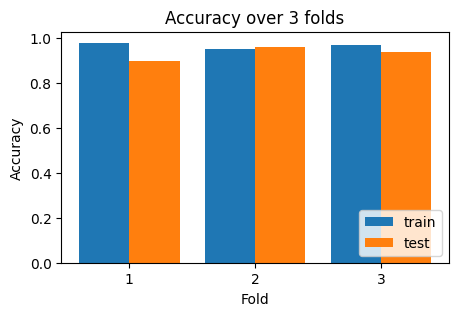

Average train accuracy over 3 folds = 0.967
Average test accuracy over 3 folds = 0.933


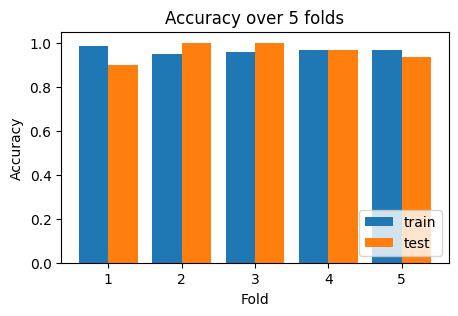

Average train accuracy over 5 folds = 0.965
Average test accuracy over 5 folds = 0.960


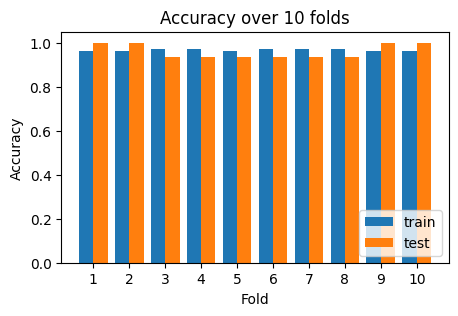

Average train accuracy over 10 folds = 0.967
Average test accuracy over 10 folds = 0.960

Estimated out-of-sample accuracy = 0.951


In [16]:
train_acc_k3, test_acc_k3 = cross_validate(3, X, y)
train_acc_k5, test_acc_k5 = cross_validate(5, X, y)
train_acc_k10, test_acc_k10 = cross_validate(10, X, y)

print("\nEstimated out-of-sample accuracy = %.3f" % np.average([test_acc_k3, test_acc_k5, test_acc_k10]))

**Discuss the results.** \
Between the three values of $k$, $k=5$ and $k=10$ appear to achieve the best average test accuracy for the virginica classifier. $k=3$ appears to result in overfitting and low bias, shown by the difference between the train and test accuracy,. $k$-fold cross validation thus provides a better estimate of the model accuracy on unseen data, to detect signs of overfitting.

## Regression

In this exercise you will experiment with a regression using non-linear polynomial transform of features. We will use the boston house-prices dataset again.

The figure below display the feature values on x axis and their transformed values on y axis in green. The labels i.e., outputs of the target function are displayed in blue, which is median value of owner-occupied homes in $1000’s.

The code below transforms the selected 1 out of 13 features with degree $d$ and coefficient $c$ according to

\begin{equation}
z_i = c_x x_{x}^{d_x} + c_{x_1} x_{x}^{d_{x-1}} + c_{x_2} x_{x}^{d_{x-2}}
\end{equation}

In [148]:
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
@interact

def plot_reg(featurex = (0,12,1),d_x = (-8,10,1),c_x_0 =(-8,10,0.1),c_x_1 =(-8,10,0.1),c_x_2 =(-8,10,0.1),bias =(-20,40,1)):
    boston = load_boston()
    features = boston.data.T
#     ofeatures = features.copy()

    features[featurex] = c_x_0*features[featurex]**d_x + c_x_1*features[featurex]**(d_x-1)+c_x_2*features[featurex]**(d_x-2)+bias

    Z=features[featurex:(featurex+1)]
    Z[Z == np.inf] = 0
    Z[Z == -np.inf] = 0
    ZT=np.transpose(Z)
    X_train, X_test, y_train, y_test = train_test_split(ZT, boston.target, test_size=0.2, random_state=0)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_tr_pred = lr.predict(X_train)
    y_te_pred = lr.predict(X_test)

    plt.figure(figsize = (10,4))
    plt.scatter(X_train, y_train, alpha=0.4,s=100, c='blue')
    #w = lr.coef_
    #b=lr.intercept_
    #plt.scatter(X_train, b+w*X_train,  alpha=0.4,s=100, c='red')
    plt.scatter(X_train, y_tr_pred,  alpha=0.4,s=100,c='green')
    plt.scatter(X_test, y_te_pred,  alpha=0.4,s=100,c='red')
    plt.xlabel(boston.feature_names[featurex])
    plt.ylabel('MEDV') 
    plt.show()
    
    df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_te_pred.flatten()})
#     print(df)
    print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_te_pred):.3f}')  
    print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_te_pred):.3f}')  
    print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_te_pred)):.3f}')

interactive(children=(IntSlider(value=6, description='featurex', max=12), IntSlider(value=1, description='d_x'…

# Coursework

## Task 3: 

Find 1 of the 13 features, its transformation with polynomial, degrees and coefficients that best approximate the target output. You can change the non-linear function in the code and range of values for the parameters. In your report:

- Report your formula, parameters, errors and figures in the coursework report.

In [156]:
def tune_params(featurex=5, d=[1], c0=[1], c1=[1], c2=[1], bias=0, 
                title="", plot_data=False, print_err=False, plot_err=True):
    boston = load_boston()
    data = boston.data.T
    
    params = [d, c0, c1, c2]
    tuned = np.argmax([len(v) for v in params])
    param = params[tuned]
    
    maes, mses, rmses = [], [], []
    
    for i in range(len(param)):
          
        # Get current param
        d_x = d[i] if len(d) > 1 else d[0]
        c_x_0 = c0[i] if len(c0) > 1 else c0[0]
        c_x_1 = c1[i] if len(c1) > 1 else c1[0]
        c_x_2 = c2[i] if len(c2) > 1 else c2[0]

        # Polynomial transformation
        features = data.copy()
        features[featurex] = c_x_0*features[featurex]**d_x + c_x_1*features[featurex]**(d_x-1)+c_x_2*features[featurex]**(d_x-2)+bias

        # Training and prediction
        Z = features[featurex:(featurex+1)]
        Z[Z == np.inf] = 0
        Z[Z == -np.inf] = 0
        X_train, X_test, y_train, y_test = train_test_split(Z.T, boston.target, test_size=0.2, random_state=0)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_tr_pred = lr.predict(X_train)
        y_te_pred = lr.predict(X_test)

        # Plot data graphs
        if plot_data:
            plt.figure(figsize = (6,2))
            plt.scatter(np.r_[X_train, X_test], np.r_[y_train, y_test], alpha=0.4, s=50, c='blue')
            plt.scatter(X_train, y_tr_pred, alpha=0.4, s=30,c='green')
            plt.scatter(X_test, y_te_pred, alpha=0.4, s=30,c='red')
            plt.xlabel(boston.feature_names[featurex])
            plt.ylabel('MEDV')
            plt.title("d=%d, c0=%.1f, c1=%.1f, c2=%.1f" % (d_x, c_x_0, c_x_1, c_x_2))
            plt.show()
    
        # Get error statistics
        mae = metrics.mean_absolute_error(y_test, y_te_pred)
        mse = metrics.mean_squared_error(y_test, y_te_pred)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_te_pred))
        if print_err:
            print(f'Mean Absolute Error: {mae:.3f}')  
            print(f'Mean Squared Error: {mse:.3f}')  
            print(f'Root Mean Squared Error: {rmse:.3f}')        
        maes.append(mae)
        mses.append(mse)
        rmses.append(rmse)
        
    # Plot error graphs
    if plot_err:
        fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3)
        fig.set_size_inches(11, 2.6)
        fig.subplots_adjust(top=0.8)
        plt.suptitle(title)

        ## MAE
        ax0.plot(param, maes, color='C0')
        ax0.set_title("Mean Absolute Error")
        ax0.set_ylim(0, max(maes)*1.5)
        x_min, y_min = param[np.argmin(maes)], min(maes)
        ax0.scatter(x_min, y_min, color='C0', marker='x', label="(%.1f,%.1f)" % (x_min, y_min))
        ax0.legend()

        ## MSE
        ax1.plot(param, mses, color='C1')
        ax1.set_title("Mean Square Error")
        ax1.set_ylim(0, max(mses)*1.5)
        x_min, y_min = param[np.argmin(mses)], min(mses)
        ax1.scatter(x_min, y_min, color='C1', marker='x', label="(%.1f,%.1f)" % (x_min, y_min))
        ax1.legend()

        ## RMSE
        ax2.plot(param, rmses, color='C2')    
        ax2.set_title("Root Mean Square Error")
        ax2.set_ylim(0, max(rmses)*1.5)
        x_min, y_min = param[np.argmin(rmses)], min(rmses)
        ax2.scatter(x_min, y_min, color='C2', marker='x', label="(%.1f,%.1f)" % (x_min, y_min))
        ax2.legend()

        plt.show()

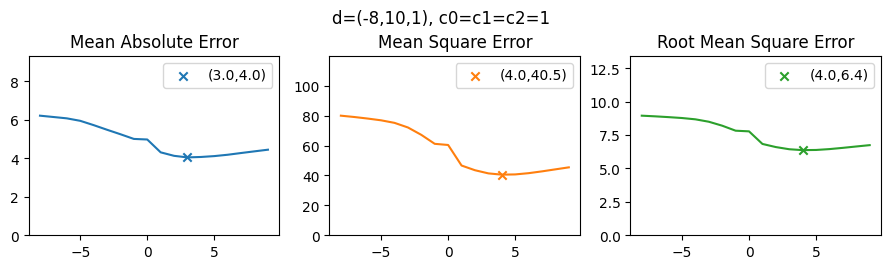

In [157]:
tune_params(d=np.arange(-8,10,1), title="d=(-8,10,1), c0=c1=c2=1")

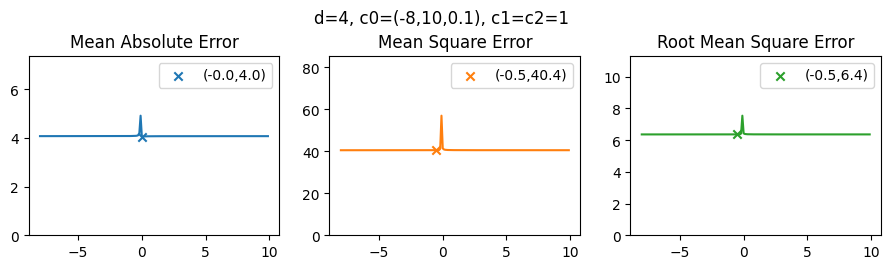

In [158]:
tune_params(d=[4], c0=np.arange(-8,10,0.1), title="d=4, c0=(-8,10,0.1), c1=c2=1")

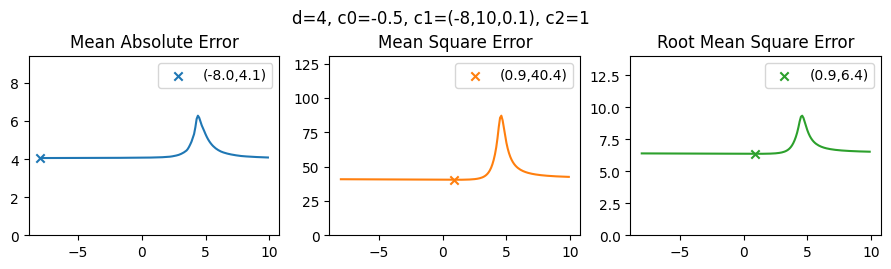

In [159]:
tune_params(d=[4], c0=[-0.5], c1=np.arange(-8,10,0.1), title="d=4, c0=-0.5, c1=(-8,10,0.1), c2=1")

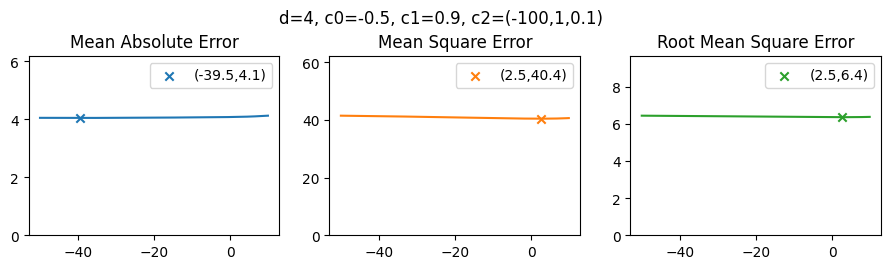

In [160]:
tune_params(d=[4], c0=[-0.5], c1=[0.9], c2=np.arange(-50,10,0.1), title="d=4, c0=-0.5, c1=0.9, c2=(-100,1,0.1)")

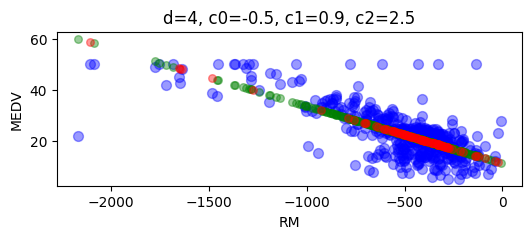

Mean Absolute Error: 4.089
Mean Squared Error: 40.444
Root Mean Squared Error: 6.360


In [161]:
tune_params(d=[4], c0=[-0.5], c1=[0.9], c2=[2.5], plot_data=True, print_err=True, plot_err=False)

For feature 5 (RM), the combination of polynomial degree and coefficients that minimises the MSE is $d=4, c_0=-0.5, c_1=0.9, c_2=2.5$, with a final RMSE of 6.360.

## Task 4:

Modify the code above to make use of all 13 features simultaneously, their transformation with polynomials, degrees and coefficients that minimize the regression error. In your report:

- Report your formula, parameters, errors and figures in the coursework report.

In [143]:
from sklearn.preprocessing import StandardScaler

def tune_params_all_features(d=[1], c0=[1], c1=[1], c2=[1], bias=0, 
                title="", print_err=False, plot_err=True):
    boston = load_boston()
    data = boston.data.T
    
    params = [d, c0, c1, c2]
    tuned = np.argmax([len(v) for v in params])
    param = params[tuned]
    
    maes, mses, rmses = [], [], []
    
    for i in range(len(param)):
          
        # Get current param
        d_x = d[i] if len(d) > 1 else d[0]
        c_x_0 = c0[i] if len(c0) > 1 else c0[0]
        c_x_1 = c1[i] if len(c1) > 1 else c1[0]
        c_x_2 = c2[i] if len(c2) > 1 else c2[0]

        # Polynomial transformation
        features = data.copy()  
        features = c_x_0*features**d_x + c_x_1*features**(d_x-1)+c_x_2*features**(d_x-2)+bias
        features[features == np.inf] = 0
        features[features == -np.inf] = 0

        # Scaling for multiple features
        X_train, X_test, y_train, y_test = train_test_split(features.T, boston.target, test_size=0.2, random_state=0)         
        scaler = StandardScaler()  
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Training and prediction
        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)
        y_tr_pred = lr.predict(X_train_scaled)
        y_te_pred = lr.predict(X_test_scaled)
    
        # Get error statistics
        mae = metrics.mean_absolute_error(y_test, y_te_pred)
        mse = metrics.mean_squared_error(y_test, y_te_pred)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_te_pred))
        if print_err:
            print(f'Mean Absolute Error: {mae:.3f}')  
            print(f'Mean Squared Error: {mse:.3f}')  
            print(f'Root Mean Squared Error: {rmse:.3f}')        
        maes.append(mae)
        mses.append(mse)
        rmses.append(rmse)
        
    # Plot error graphs
    if plot_err:
        fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3)
        fig.set_size_inches(11, 2.6)
        fig.subplots_adjust(top=0.8)
        plt.suptitle(title)

        ## MAE
        ax0.plot(param, maes, color='C0')
        ax0.set_title("Mean Absolute Error")
        ax0.set_ylim(0, max(maes)*1.5)
        x_min, y_min = param[np.argmin(maes)], min(maes)
        ax0.scatter(x_min, y_min, color='C0', marker='x', label="(%.1f,%.1f)" % (x_min, y_min))
        ax0.legend()

        ## MSE
        ax1.plot(param, mses, color='C1')
        ax1.set_title("Mean Square Error")
        ax1.set_ylim(0, max(mses)*1.5)
        x_min, y_min = param[np.argmin(mses)], min(mses)
        ax1.scatter(x_min, y_min, color='C1', marker='x', label="(%.1f,%.1f)" % (x_min, y_min))
        ax1.legend()

        ## RMSE
        ax2.plot(param, rmses, color='C2')    
        ax2.set_title("Root Mean Square Error")
        ax2.set_ylim(0, max(rmses)*1.5)
        x_min, y_min = param[np.argmin(rmses)], min(rmses)
        ax2.scatter(x_min, y_min, color='C2', marker='x', label="(%.1f,%.1f)" % (x_min, y_min))
        ax2.legend()

        plt.show()

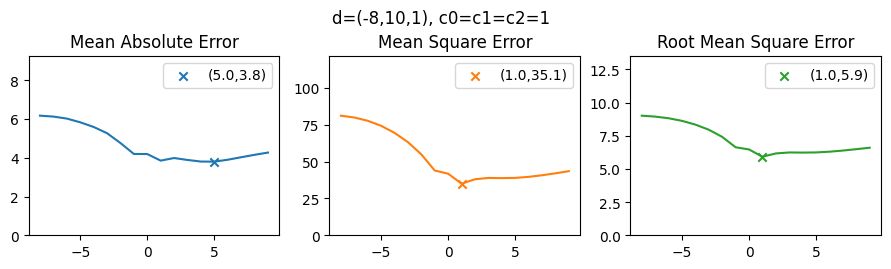

In [144]:
tune_params_all_features(d=np.arange(-8,10,1), title="d=(-8,10,1), c0=c1=c2=1")

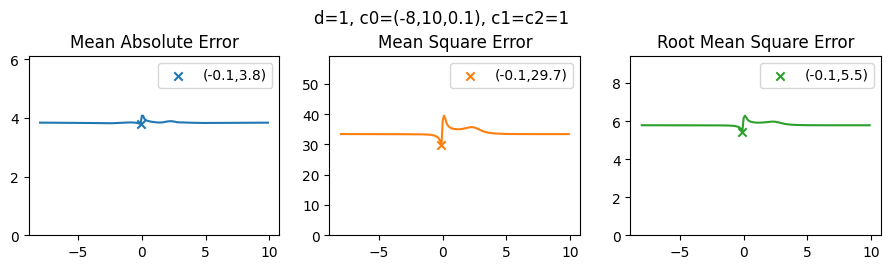

In [137]:
tune_params_all_features(d=[1], c0=np.arange(-8,10,0.1), title="d=1, c0=(-8,10,0.1), c1=c2=1")

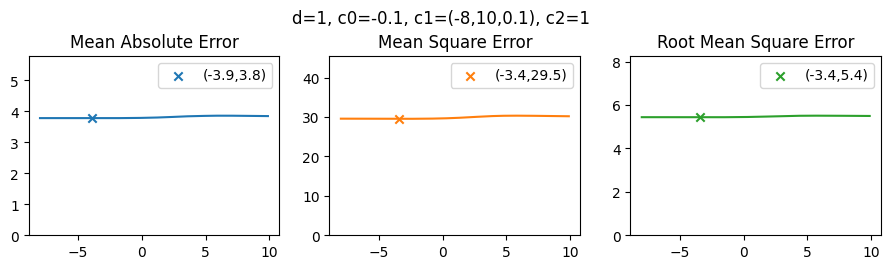

In [145]:
tune_params_all_features(d=[1], c0=[-0.1], c1=np.arange(-8,10,0.1), title="d=1, c0=-0.1, c1=(-8,10,0.1), c2=1")

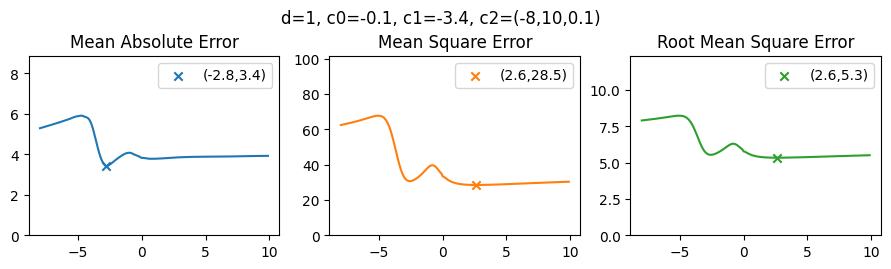

In [146]:
tune_params_all_features(d=[1], c0=[-0.1], c1=[-3.4], c2=np.arange(-8,10,0.1), title="d=1, c0=-0.1, c1=-3.4, c2=(-8,10,0.1)")

In [147]:
tune_params_all_features(d=[1], c0=[-0.1], c1=[-3.4], c2=[2.6], print_err=True, plot_err=False)

Mean Absolute Error: 3.842
Mean Squared Error: 28.487
Root Mean Squared Error: 5.337


For all 13 features, the combination of polynomial degree and coefficients that minimises the MSE is $d=1, c_0=-0.1, c_1=-3.4, c_2=2.6$, with a final RMSE of 5.337, which is lower than that of the single feature.